In [1]:
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


plt.rcParams['figure.figsize'] = [10, 8]
%matplotlib inline

# EDA

Import and construct a dataframe with the Iris dataframe

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()

# Convert the Iris dataset to a Pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

X = iris.data
y = iris.target


In [3]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [4]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Correlations analysis

<Axes: >

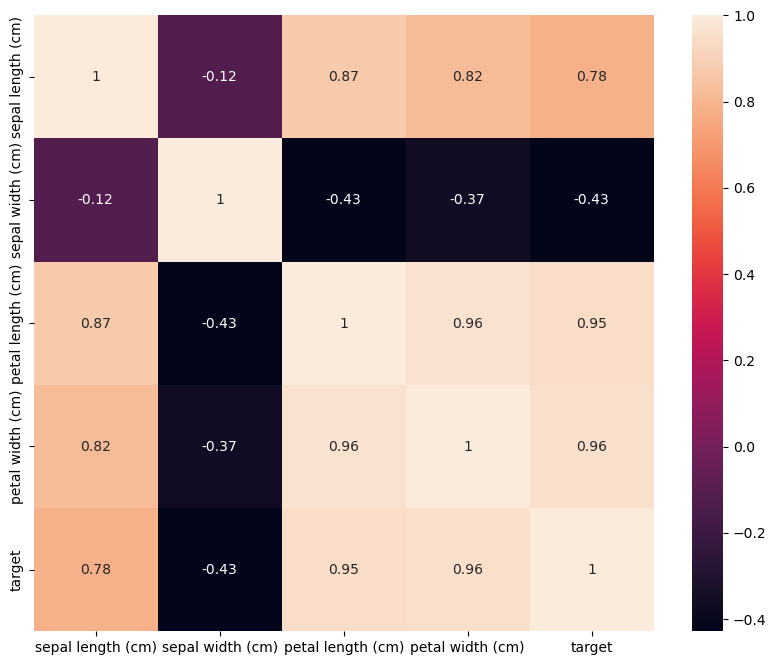

In [5]:
sns.heatmap(iris_df.corr(), annot=True)

<Axes: >

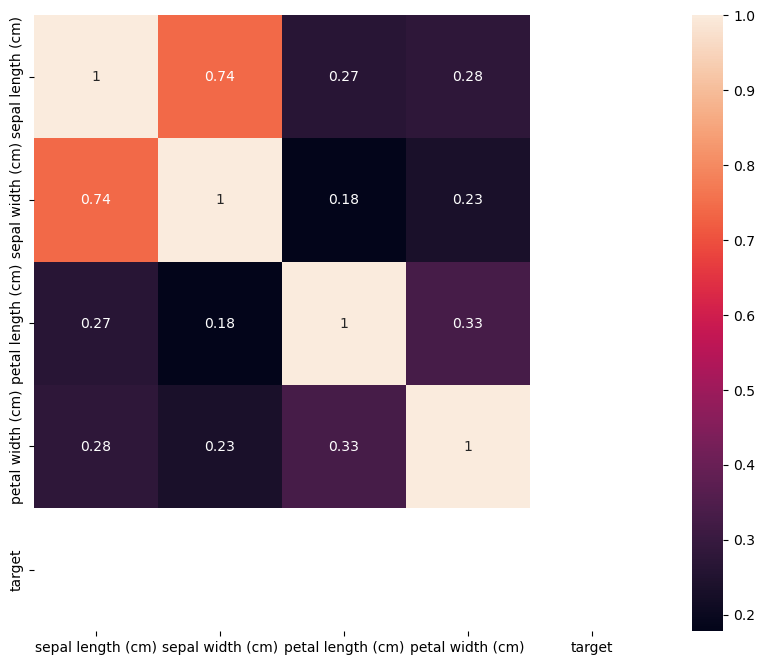

In [6]:
sns.heatmap(iris_df[iris_df['target'] == 0].corr(), annot=True)

<Axes: >

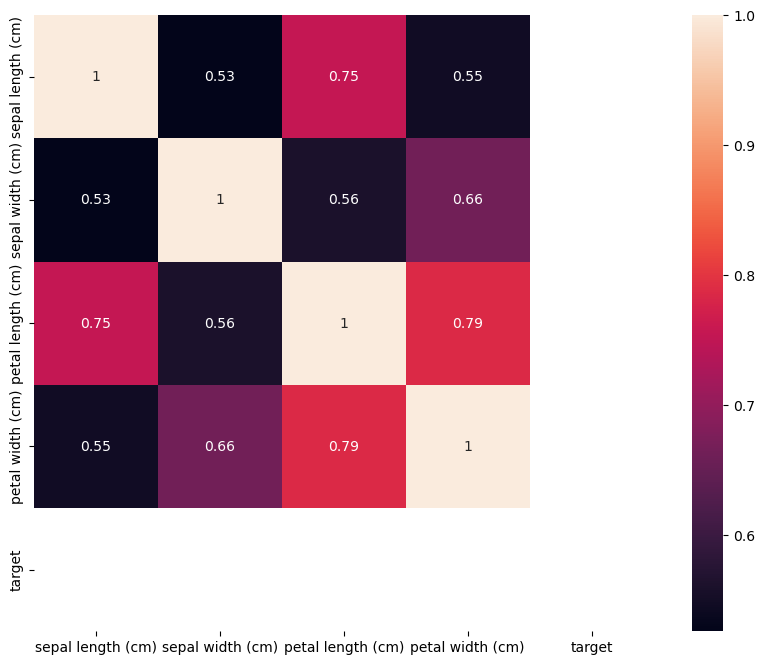

In [7]:
sns.heatmap(iris_df[iris_df['target'] == 1].corr(), annot=True)

c:\Users\Zayan\anaconda3\envs\ci_win\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Zayan\anaconda3\envs\ci_win\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Zayan\anaconda3\envs\ci_win\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Zayan\anaconda3\envs\ci_win\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

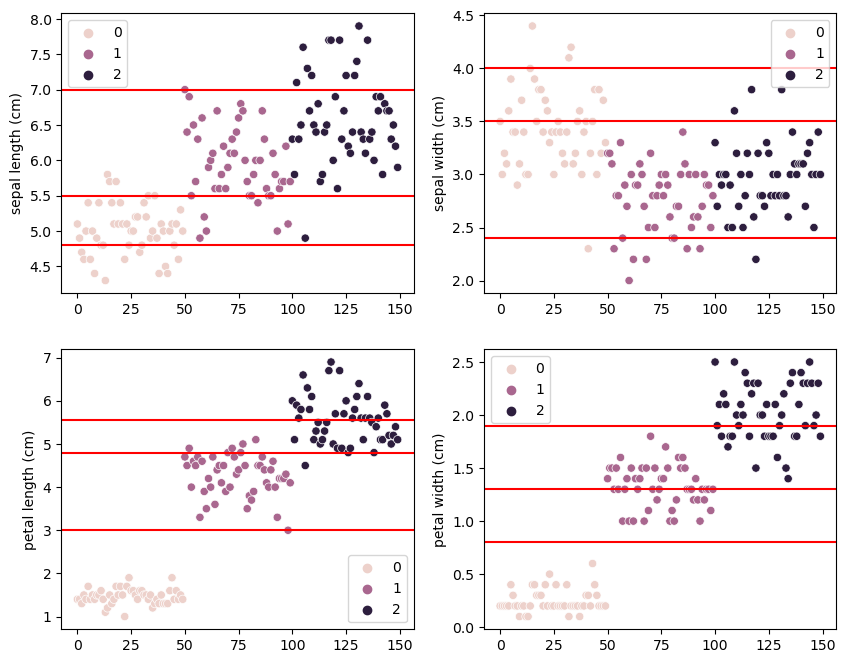

In [23]:
fig, axes = plt.subplots(2, 2)

sns.scatterplot(data = iris_df, x=iris_df.index , y=iris_df['sepal length (cm)'], hue=y, ax=axes[0,0])
axes[0,0].axhline(y=4.8,color='r')
axes[0,0].axhline(y=5.5,color='r')
axes[0,0].axhline(y=7,color='r')
sns.scatterplot(data = iris_df, x=iris_df.index , y=iris_df['sepal width (cm)'], hue=y, ax=axes[0,1])
axes[0,1].axhline(y=2.4,color='r')
axes[0,1].axhline(y=3.5,color='r')
axes[0,1].axhline(y=4,color='r')
sns.scatterplot(data = iris_df, x=iris_df.index , y=iris_df['petal length (cm)'], hue=y, ax=axes[1,0])
axes[1,0].axhline(y=3,color='r')
axes[1,0].axhline(y=4.8,color='r')
axes[1,0].axhline(y=5.55,color='r')
sns.scatterplot(data = iris_df, x=iris_df.index , y=iris_df['petal width (cm)'], hue=y, ax=axes[1,1])
axes[1,1].axhline(y=0.8,color='r')
axes[1,1].axhline(y=1.3,color='r')
axes[1,1].axhline(y=1.9,color='r')


<Axes: xlabel='petal width (cm)', ylabel='Count'>

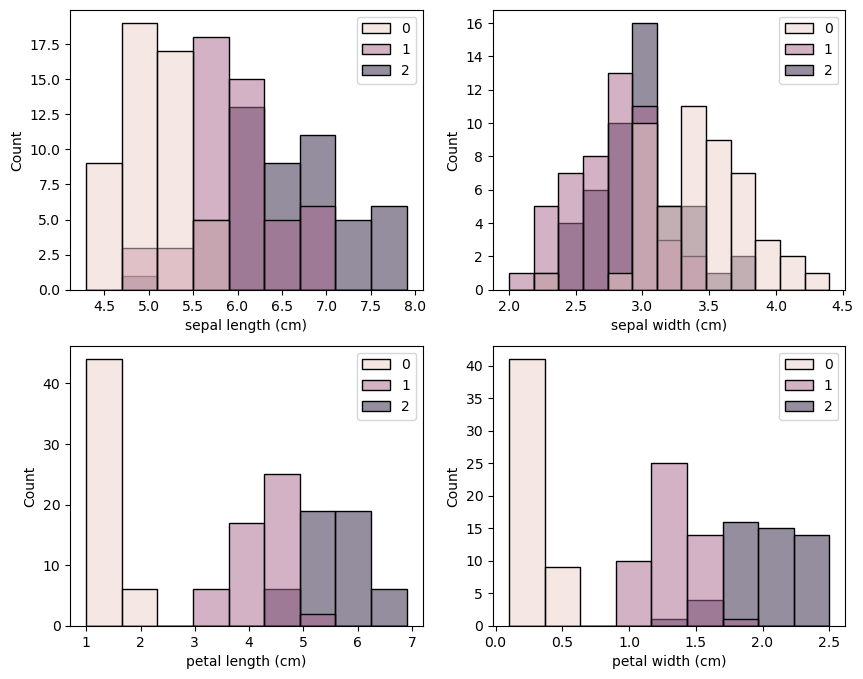

In [7]:

fig, axes = plt.subplots(2, 2)

sns.histplot(data = iris_df, x=iris_df['sepal length (cm)'], hue=y, ax=axes[0,0])
sns.histplot(data = iris_df, x=iris_df['sepal width (cm)'], hue=y, ax=axes[0,1])
sns.histplot(data = iris_df, x=iris_df['petal length (cm)'], hue=y, ax=axes[1,0])
sns.histplot(data = iris_df, x=iris_df['petal width (cm)'], hue=y, ax=axes[1,1])

Check for outliers

# FIS

Find the mean and std dev of each feature

In [8]:
# find the mean and standard deviation of each feature
mu_cols = []
sigma_cols = []
for col in iris_df.columns:
    mu_cols.append(iris_df[col].mean())
    sigma_cols.append(iris_df[col].std())

    # round to 2 decimal places
    mu_cols = [round(mu,2) for mu in mu_cols]
    sigma_cols = [round(sigma,2) for sigma in sigma_cols]


In [9]:
print(mu_cols)
print(sigma_cols)

[5.84, 3.06, 3.76, 1.2, 1.0]
[0.83, 0.44, 1.77, 0.76, 0.82]


Find the mean and std dev of each feature of each class

In [10]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
mean_per_class = {}
std_devs_per_class = {}

for col in iris_df.columns[:-1]:
    for t in iris_df.target.unique():
        mean_per_class[f'{col}_{t}'] = round(iris_df[iris_df.target == t][col].mean(), 2)
        std_devs_per_class[f'{col}_{t}'] = round(iris_df[iris_df.target == t][col].std(), 2)


# Fit membership functions to data

Try 2 approaches:
1. Interpolation
2. Fit mf function

use https://pythonhosted.org/scikit-fuzzy/_modules/skfuzzy/fuzzymath/fuzzy_ops.html#interp_membership

Approach 1

In [12]:
# function to produce prob of a gaussian
def gaussian(x, mu, sigma):
    '''Get pdf over x'''
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    


In [13]:
# function for getting gaussian mf
def get_gauss_mf(x, feature_idx):
    '''Get the pdf over x for the mean and std based on the feature index (feature_idx)'''
    
    mu = mu_cols[feature_idx]
    std = sigma_cols[feature_idx]
    gauss_mf = gaussian(x, mu, std)

    return gauss_mf


In [14]:
# function to get membership values for data
def get_mv(mf, x, arr):
    '''Get the membership of data from arr by using the membership function mf in x'''

    mvs = []
    for val in arr:

        # check if value exists in universe of discourse
        if val in x:
            idx = x.index(val)
            mv = mf[idx]
            mvs.append(mv)

        # else, interpolate
        else:

            # convert universe of discourse (list) to a numpy array
            x_ndarray = np.asarray(x)
            # find the nearest two points
            l = x_ndarray[x_ndarray <= val][-1]
            u = x_ndarray[x_ndarray >= val][0]

            idl = np.nonzero(x_ndarray == l)[0][0]
            idu = np.nonzero(x_ndarray == u)[0][0]

            xmvl = mf[idl]
            xmvu = mf[idu]

            slope = (xmvu - xmvl) / float(u - l)
            mv = slope * (val - l) + xmvl

            mvs.append(mv)

    return mvs
        

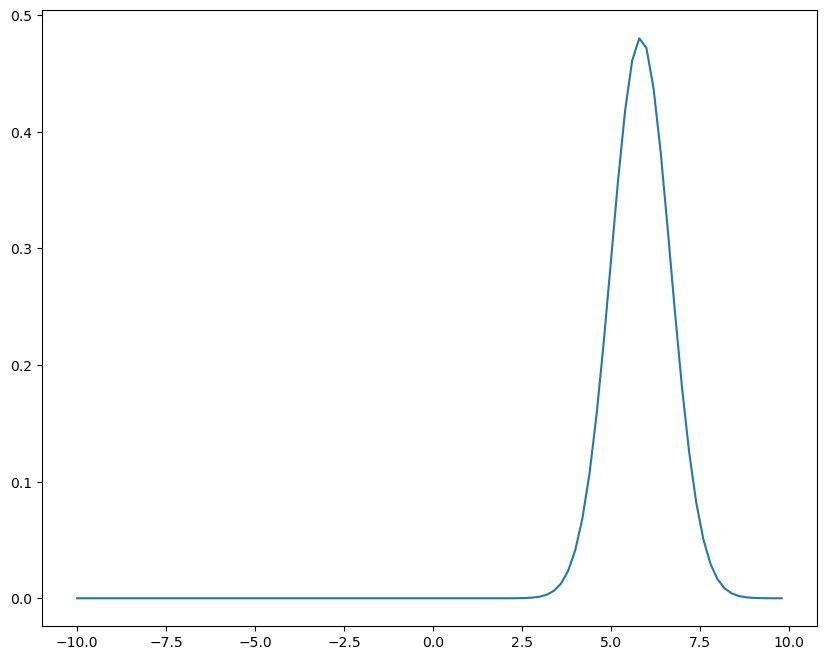

In [15]:
# universe of discourse, for all features
u = 10 # upper bound of universe
l = -10 # lower bound of universe
n = 100 # number of points in universe
spacing = (u-l)/n # spacing

x = np.round(np.arange(l,u,spacing), 2)
x = list(x)

# index of columns
sl = 0
sw = 1
pl = 2
pw = 3

# create gaussian mf
gauss_mf_sl = get_gauss_mf(x, sl) # create for sepal length
sl_mf = get_mv(gauss_mf_sl, x, iris_df['sepal length (cm)'])

plt.plot(x, gauss_mf_sl)

Approach 2

In [16]:
# create empty array 
rows = X.shape[0]
cols = X.shape[1]
iris_gaussian = np.zeros(shape=(rows, cols))

# apply gaussian() to every value in every column
for row in range(rows):
    for col in range(cols):
        val = X[row, col]
        mu = mu_cols[col]
        std = sigma_cols[col]

        iris_gaussian[row, col] = round(gaussian(val, mu, std), 2)

Text(0.5, 1.0, 'Membership values of sepal length (for gaussian mf)')

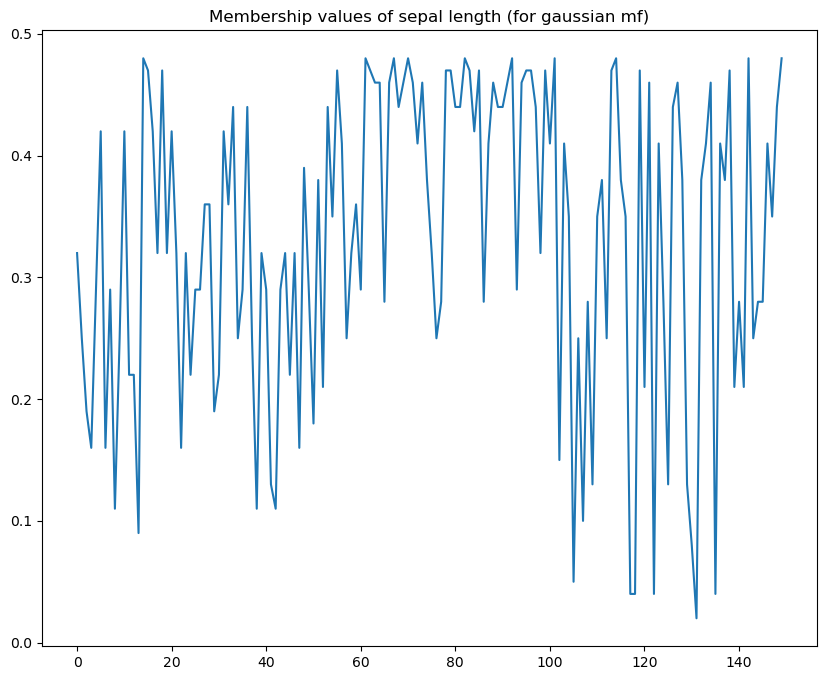

In [17]:
# plot all mf
x_axis = [i/10.0 for i in range(-10,10+1)] # numbers from -10 to +10 with steps of 0.1

pdf = iris_gaussian[:,0]
plt.plot(pdf)
plt.title("Membership values of sepal length (for gaussian mf)")

Get membership functions for each feature of each class

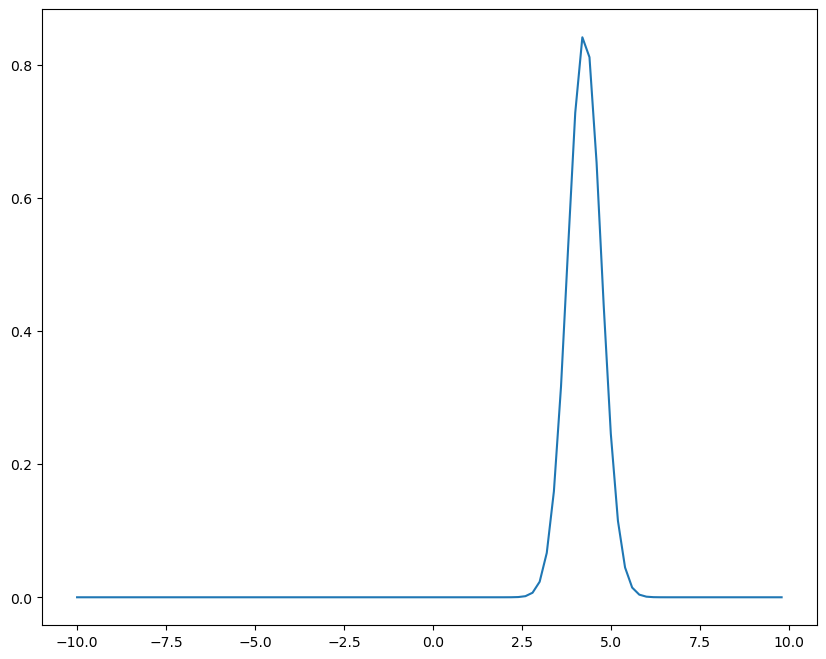

In [18]:
# universe of discourse, for all features
u = 10 # upper bound of universe
l = -10 # lower bound of universe
n = 100 # number of points in universe
spacing = (u-l)/n # spacing

x = np.round(np.arange(l,u,spacing), 2)
# x = list(x)

gaussian_mfs = {}

for (mean_feature, mean),(std_feature, std) in zip(mean_per_class.items(), std_devs_per_class.items()):
    gaussian_mfs[f"{mean_feature}"] = gaussian(x, mean, std)

gaussian_mfs['sepal length (cm)_0'].shape

plt.plot(x, gaussian_mfs['petal length (cm)_1'])


# Test code

In [19]:
# test code
arr = np.arange(1,11)

print(arr)
xx = 7
l = arr[arr <= xx][-1]
u = arr[arr >=xx][0]
print(l, u)
print(np.nonzero(arr==l))
idl = np.nonzero(arr == l)[0][0]
idu = np.nonzero(arr == u)[0][0]
print(idl, idu)

[ 1  2  3  4  5  6  7  8  9 10]
7 7
(array([6]),)
6 6


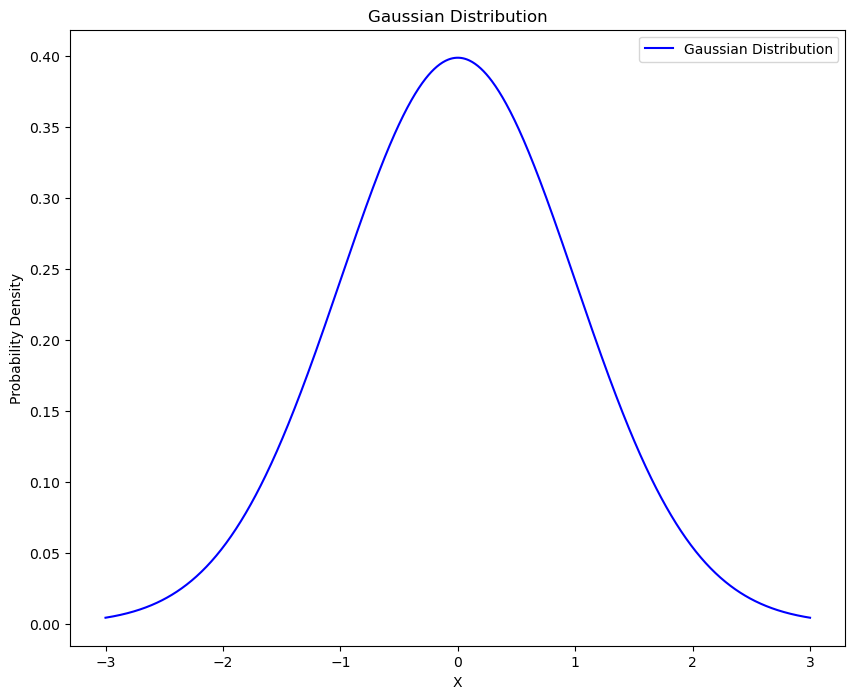

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Mean and standard deviation (change these values as needed)
mu = 0  # Mean
sigma = 1  # Standard Deviation

# Generate data points for the Gaussian distribution
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)  # Adjust the range as needed
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Create a plot
plt.plot(x, y, label='Gaussian Distribution', color='b')
plt.title('Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

# Display the plot
plt.show()
